In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('voice.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


Every feature has float data type. The target column, "label" has object data type. There is no missing value in each column, which is great.

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

We have balance number of male and female in the label column

In [8]:
# i = 1
# plt.figure(figsize=(20,10))
# for column in df.drop('label', axis=1).columns:
#     plt.subplot(5, 4, i)
#     sns.distplot(df[df['label'] == 'male'][column], label='male')
#     sns.distplot(df[df['label'] == 'female'][column], label='female')
#     plt.legend()
#     i += 1
# plt.tight_layout()
# plt.show()

It looks like that the distribution of female and male for several columns can easily be distinct. That is good. Our model should have good accuracy score.

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [10]:
X = df.drop('label', axis=1)
y = df['label']

In [11]:
cross_val_score(XGBClassifier(), X, y, cv=5)

array([0.9384858 , 0.98107256, 0.97791798, 0.98264984, 0.96360759])

Pretty nice accuracy with xgboost

### Compare XGBoost with other model

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
model = [RandomForestClassifier, GradientBoostingClassifier, DecisionTreeClassifier, LogisticRegression, SVC, XGBClassifier]
model_name = ['RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'LogisticRegression', 'SVC',
              'XGBClassifier']

ls_score = []
for model, name in zip(model, model_name):
    score = cross_val_score(model(), X, y, cv=5)
    ls_score.append([name, score.mean()])

C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Elga Ridho Maul

In [18]:
df_score = pd.DataFrame(ls_score)

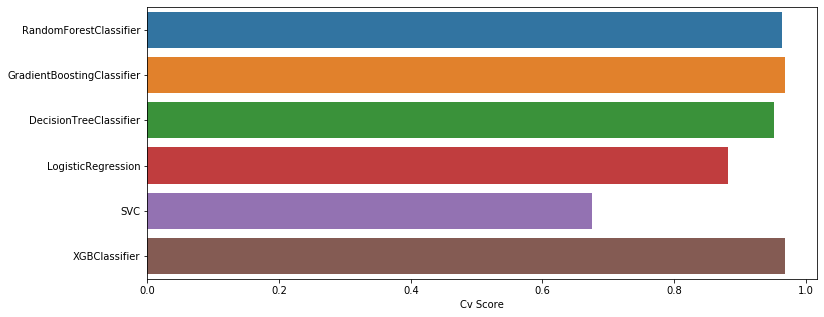

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(y=df_score[0], x=df_score[1])
plt.xlabel('Cv Score')
plt.ylabel('')
plt.show()

### Learning Curve

Learning Curve is important when we want to know how much training set that we need to create a good model

In [25]:
from sklearn.model_selection import learning_curve

In [28]:
train_size, train_score, test_score = learning_curve(XGBClassifier(), X, y, train_sizes=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ,0.8 ,0.9]), cv=3)

In [29]:
test_score

array([[0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.5       ],
       [0.84659091, 0.93560606, 0.88731061],
       [0.85132576, 0.93465909, 0.93371212],
       [0.85984848, 0.98200758, 0.97537879],
       [0.93181818, 0.98011364, 0.97443182]])

In [30]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

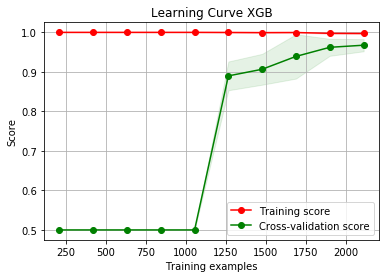

In [33]:
plot_learning_curve(XGBClassifier(), 'Learning Curve XGB', X, y, cv=3, train_sizes=np.linspace(0.1,1,10))
plt.show()

### Pipeline

In [34]:
# Standard Scaler
# PCA
# Modelling

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('modelling', XGBClassifier())
])

In [41]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('modelling',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bytree=1, gamma=0,
                               learning_rate=0.1, max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=True, subsample=1))],
         verbose=False)

In [42]:
y_pred = pipe.predict(X_test)

In [43]:
y_pred

array(['female', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'female', 'male', 'male', 'male', 'female',
       'male', 'female', 'male', 'female', 'male', 'male', 'female',
       'female', 'female', 'female', 'male', 'male', 'female', 'female',
       'male', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'female', 'female', 'male', 'male', 'male', 'male',
       'male', 'female', 'female', 'male', 'male', 'male', 'female',
       'female', 'female', 'female', 'female', 'male', 'female', 'male',
       'female', 'male', 'female', 'female', 'female', 'male', 'male',
       'male', 'female', 'male', 'male', 'female', 'male', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'male', 'male', 'male', 'female', 'male', 'male',
       'female', 'female', 'male', 'female', 'male', 'female', 'female',
       'female', 'female', 'female', 'male', 'male', 'male', 'female',
       'female', 'male

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.97      0.95      0.96       309
        male       0.96      0.98      0.97       325

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



### Hyperparameter XGBClassifier

In [46]:
from sklearn.model_selection import GridSearchCV

In [52]:
param = {'n_estimators' : [10, 50, 100, 200],
        'learning_rate' : [0.1, 0.15, 0.25, 0.5],
        'max_depth' : [1,3,5,7]}

In [53]:
grid = GridSearchCV(XGBClassifier(), param_grid=param, cv=3)

In [54]:
grid.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.15, 0.25, 0.5],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [10, 50, 100, 200]},
             pre_dis

In [55]:
grid.best_params_

{'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 50}

In [56]:
grid.best_score_

0.9690656565656566

### Export Pipeline To SAV

In [60]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('modelling', XGBClassifier(learning_rate= 0.25, max_depth= 3, n_estimators= 50))
])

pipe2.fit(X_train, y_train)

import pickle

pickle.dump(pipe2, open('pipe.sav', 'wb'))